# Titanic - Machine Learning from Disaster

## 1° Problema de Negócio 

## 2° Análise Exploratória dos Dados

### 2.1 - Conexão com os Dados

In [1]:
# Importando Pacotes e Bibliotecas:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Conectando com os Dados:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### 2.2 - Conhecendo valores de registros para as variáveis

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* A Coluna 'Survived' da tabela train será nossa targt

### 2.3 - Conhecendo as Dimensões do dataset e suas variáveis

In [5]:
# Verificando a Shape (dimensões) do dataset:
df_train.shape

(891, 12)

In [6]:
#Verificando informações adicionais do dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Verificando se há valores Missing (valores ausentes) dos pacientes:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Verificando se há linhas duplicadas
df_train.duplicated().sum()

0

In [9]:
# Estatística Descritiva das Variáveis:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.4 Estudo das Variáveis 

#### Variável Target 

In [10]:
# Tabela de Frequência da Variável "Survived" - Nossa Classe ou Label ou Target ou Y ou Variável a ser Predita (o que a gente quer descobrir)
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

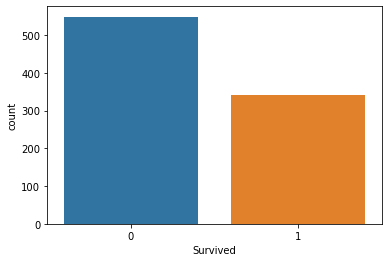

In [11]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(df_train['Survived'])

#### Variável "Embarked"

In [12]:
# Tabela de Frequência da Variável "rbc" 
df_test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

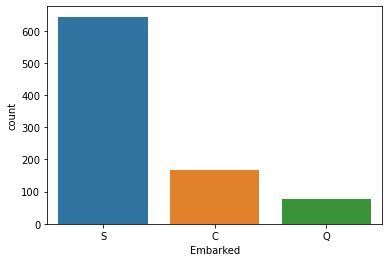

In [13]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(df_train['Embarked'])

### Variável "Pclass"

In [14]:
# Tabela da variável "pclass"
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

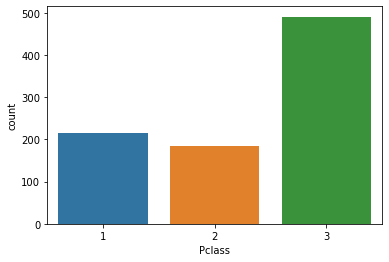

In [15]:
# Criando gráfico de barras para a variáeis categóricas
sns.countplot(df_train['Pclass'])

### Variável "Age"

In [16]:
# Tabela de Frequência da Variável "Age" 
df_train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

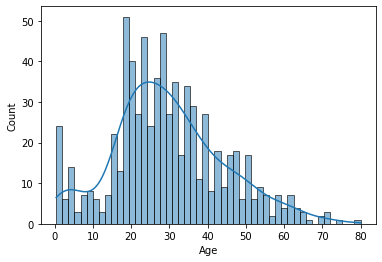

In [17]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(df_train['Age'], bins=50, kde=True)

## 3° Pré-Processamento dos Dados

#### Série de atividades que faremos para corrigir os dados, tais como:

  * Tratar valores missing
  * Eliminar registros Duplicados
  * Transformações para deixar as variáveis na mesma escala
  * Conversão de de Variáveis "Object" em numéricas 
  * Eliminação de variáveis que não ajudam na previsão
  * Criação de variáveis novas
  * Demais tratamentos nos dados antes de criar as Máquinas Preditivas

In [18]:
# Tipo das Variáveis (numeros ou texto?):
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
# Eliminando Variáveis desnecessárias (CPF não é explicativa) :
df_train = df_train.drop(['Name','Ticket','Cabin','PassengerId'], axis=1, errors='ignore')
df_test = df_test.drop(['Name','Ticket','Cabin','PassengerId'], axis=1, errors='ignore')

### 3.1 - Substituindo Valores categóricos (object) em números:

### Sex

In [20]:
# Tabela de Frequência
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
df_train['Sex'] = df_train['Sex'].replace(to_replace = {'male' : 0, 'female' : 1})
df_test['Sex'] = df_test['Sex'].replace(to_replace = {'male' : 0, 'female' : 1})

### Embarked

In [22]:
# Tabela de Frequência
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df_train['Embarked'] = df_train['Embarked'].replace(to_replace = {'S' : 0, 'C' : 1, 'Q':2})
df_test['Embarked'] = df_test['Embarked'].replace(to_replace = {'S' : 0, 'C' : 1, 'Q':2})

In [24]:
# Estatística Descritiva das variáveis:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### 3.2 - Tratando Valores missings:

In [25]:
# Cheaking Missing (NaN) Values:
df_train.isnull().sum().sort_values(ascending=False)

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [26]:
# Atribuindo valores (médios) para variavel "Age' nulos.
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [27]:
# Visualinzando registros nulos da variável "Embarked"
df_train[df_train.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,1,38.0,0,0,80.0,NaN
829,1,1,1,62.0,0,0,80.0,NaN


In [28]:
# Excluindo registros nulos com base na variável "Embarked"
df_train = df_train.loc[df_train.Embarked.isnull() == False]
df_test = df_test.loc[df_test.Embarked.isnull() == False]

In [29]:
# Cheaking Missing (NaN) Values:
df_train.isnull().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

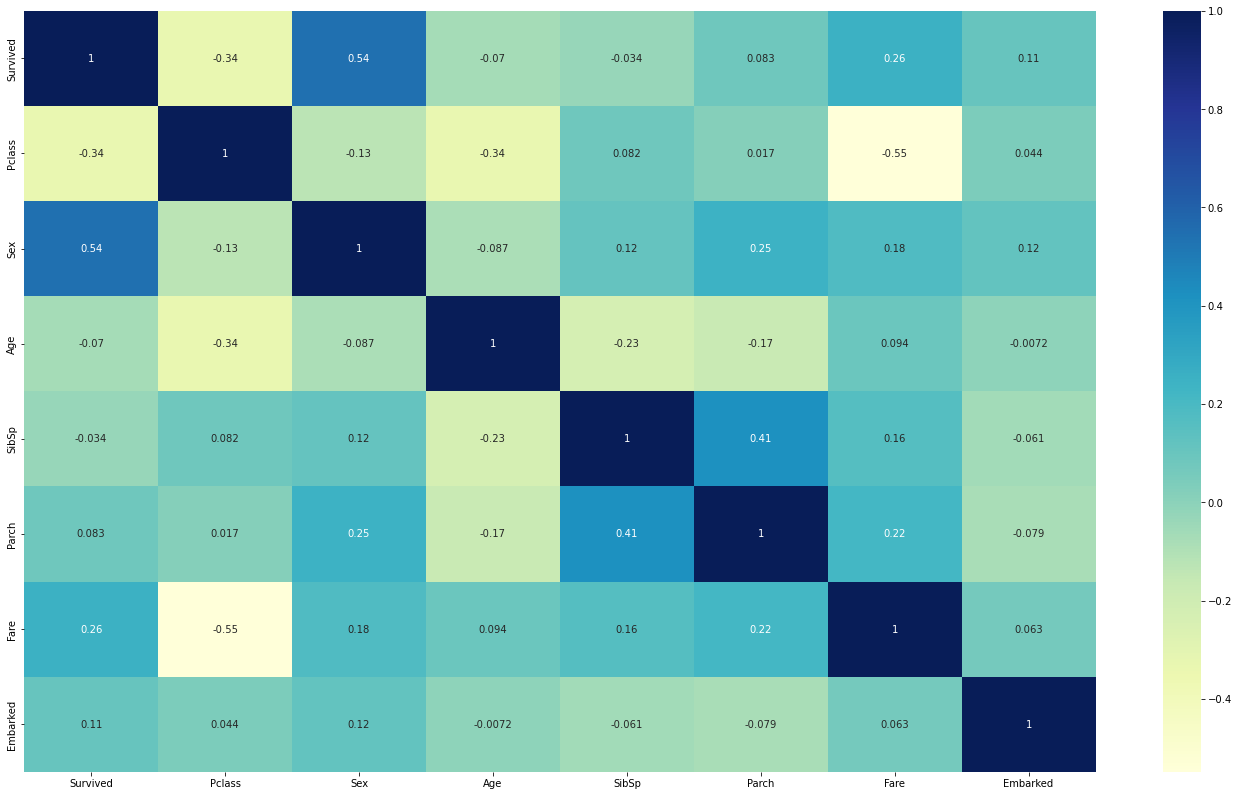

In [30]:
# Criação da Figura Gráfica
plt.figure(figsize=(24,14))
# Criação do Gráfico heatmap
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

## 4° - Construção e Avaliação da Máquina Preditiva

### 4.1 - Separação/split das Variáveis explicativas (X) e o Target (y) para treinamento do algoritmo na Máquina Preditiva

In [31]:
# Independent and Dependent Feature:
x = df_train.drop(['Survived'], axis=1)
y = df_train.Survived

### 4.0 - Descobrindo quais são as melhores variáveis

In [32]:
# Verificando quais Features são as mais Importantes:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

### 4.2 - Fazendo a amostragem dos dados para Treinar (dados de treino) e para Avaliar a Máquina Preditiva (dados de teste)

In [33]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=33)

In [34]:
print(X_train.shape)
print(X_test.shape)

(622, 7)
(267, 7)


### 4.3 - Criando o Baseline com o Algoritmo **RandomForest**

In [35]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
#Realizando o treinamento (fit) com os dados de treino
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

In [37]:
# Fazendo Previsões com dados de teste:
y_pred = RandomForest.predict(X_test)

In [38]:
# Avaliando a Performance comparando com o gabarito (y) de teste:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8127340823970037
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       175
           1       0.77      0.65      0.71        92

    accuracy                           0.81       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.81      0.81      0.81       267



In [39]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[157  18]
 [ 32  60]]


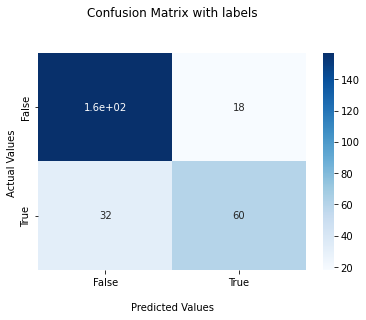

In [40]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### 4.4 Prevendo dados de teste

In [41]:
# Prevendo com dados test
test_pred = RandomForest.predict(df_test)

In [42]:
# Criando Dataframe com Provisão
df_test_pred = pd.DataFrame(columns=['PassengerId','Survived'], data=enumerate(test_pred, start=892))
df_test_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [43]:
# Salvando previsão test
df_test_pred.to_csv('segunda_previsao.csv', index=False)

### 4.5 Prevendo dados de teste para best 5 colunas

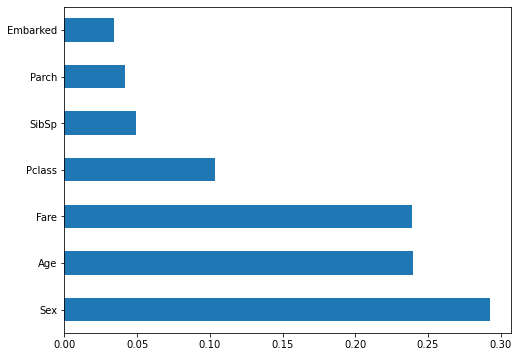

In [44]:
# Usando o ExtraTree  para nos mostrar as Variáveis mais Importantes
model=ExtraTreesClassifier()
model.fit(x,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

In [45]:
#Função para ranquear as 5 mais importantes
ranked_features.nlargest(5).index

Index(['Sex', 'Age', 'Fare', 'Pclass', 'SibSp'], dtype='object')

In [46]:
#Separando 5 melhores colunas
best_colluns = ['Sex', 'Fare', 'Age', 'Pclass', 'SibSp']

In [47]:
#Realizando o treinamento (fit) com os dados de treino
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train[best_colluns],y_train)

In [48]:
# Fazendo Previsões com dados de teste:
y_pred = RandomForest.predict(X_test[best_colluns])

In [49]:
# Avaliando a Performance comparando com o gabarito (y) de teste:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8164794007490637
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       175
           1       0.77      0.66      0.71        92

    accuracy                           0.82       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.81      0.82      0.81       267



In [50]:
# Prevendo com dados test
test_pred = RandomForest.predict(df_test[best_colluns])

In [51]:
# Criando Dataframe com Provisão
df_test_pred = pd.DataFrame(columns=['PassengerId','Survived'], data=enumerate(test_pred, start=892))
df_test_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [52]:
# Salvando previsão test
df_test_pred.to_csv('terceira_previsao.csv', index=False)